In [1]:
print("Serwr")

Serwr


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')

In [4]:
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [5]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [6]:
df  = df.drop(columns=' Net Income Flag')

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [27]:
for i in df.columns:

    df[i] = df[i].fillna(df[i].mean())

In [28]:
df.head()

ROA(C) before interest and depreciation before interest  \
0                                                257          
1                                                 18          
2                                                224          
3                                                363          
4                                                331          

    ROA(A) before interest and % after tax  \
0                                      320   
1                                       43   
2                                      164   
3                                      358   
4                                      333   

    ROA(B) before interest and depreciation after tax  \
0                                                278    
1                                                 32    
2                                                201    
3                                                373    
4                                                316    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                      210                           208   
1                        0                             0   
2                      199                           198   
3                      256                           253   
4                      304                           302   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                     265                         329   
1                       4                           7   
2                     141                         155   
3                     319                         376   
4                     354                         298   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                           338                                           355   
1                             9                                           108   
2                           161                                           156   
3                           388                                           381   
4                           291                                           165   

    Continuous interest rate (after tax)  ...   Net Income to Total Assets  \
0                                    326  ...                          336   
1                                      7  ...                           90   
2                                    158  ...                          177   
3                                    392  ...                          377   
4                                    290  ...                          347   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                         418                  265                     220   
1                         154                   84                       0   
2                         113                    0                     209   
3                         253                   69                     272   
4                          76                  266                     324   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                                  327                   143   
1                                  108                   184   
2                                  146                   376   
3                                  364                   140   
4                                  385                   288   

    Degree of Financial Leverage (DFL)  \
0                                  335   
1                                  193   
2                                   61   
3                                  305   
4                                  301   

    Interest Coverage Ratio (Interest expense to EBIT)   Equity to Liability  \
0                                                324                     302   
1                                                182                     261  

In [40]:
plt.figure(figsize=(100, 100))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.savefig("heatmap.pdf", dpi=300, format="pdf")
plt.show()

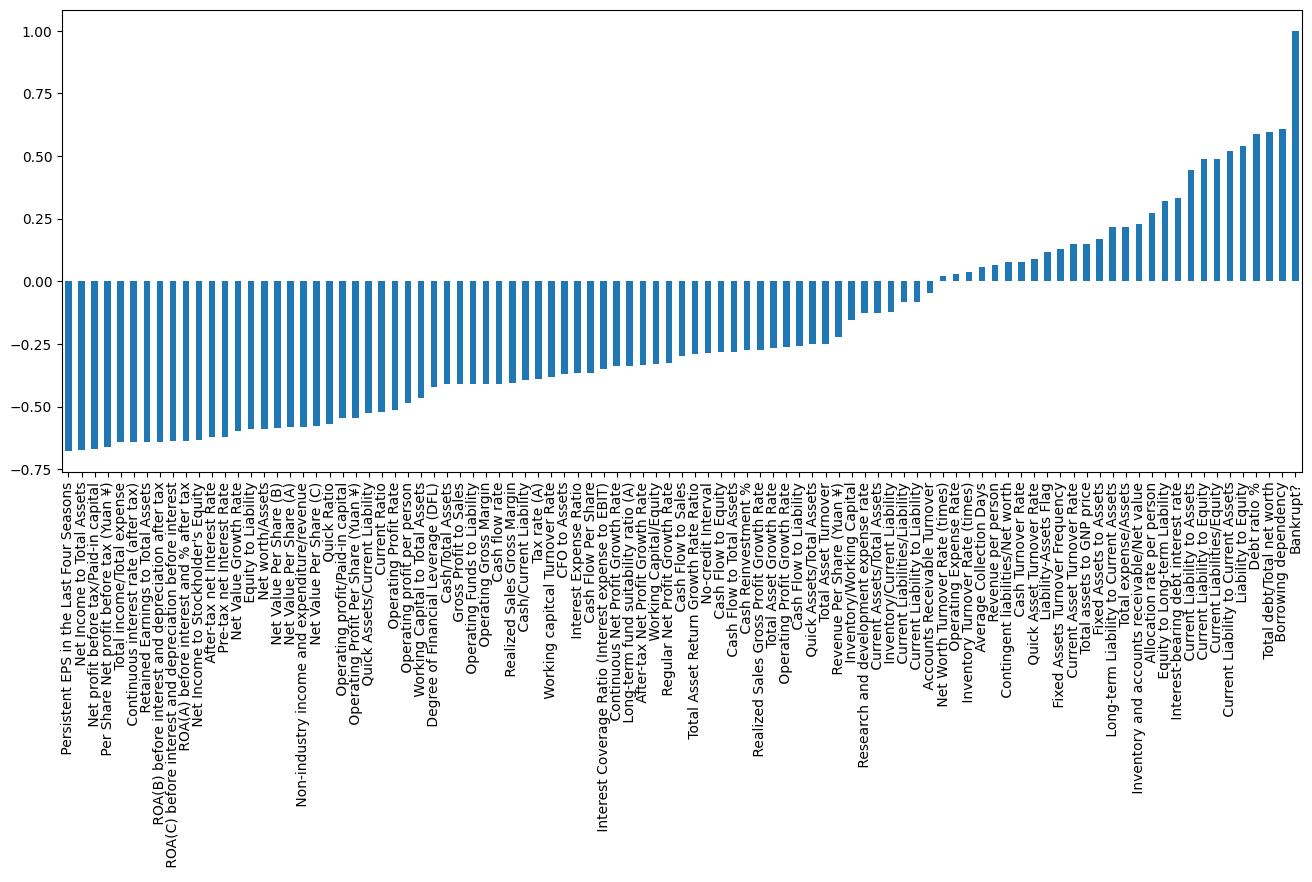

In [41]:
df.corrwith(df['Bankrupt?']).sort_values(ascending=True).plot(kind='bar',figsize=(16, 6))
plt.savefig("Correalation.pdf", dpi=300, format="pdf")

In [31]:
sdf

ROA(C) before interest and depreciation before interest  \
0                                                  257          
1                                                   18          
2                                                  224          
3                                                  363          
4                                                  331          
..                                                 ...          
435                                                 91          
436                                                  4          
437                                                 27          
438                                                 28          
439                                                259          

      ROA(A) before interest and % after tax  \
0                                        320   
1                                         43   
2                                        164   
3                                        358   
4                                        333   
..                                       ...   
435                                       63   
436                                       12   
437                                       15   
438                                       27   
439                                      246   

      ROA(B) before interest and depreciation after tax  \
0                                                  278    
1                                                   32    
2                                                  201    
3                                                  373    
4                                                  316    
..                                                 ...    
435                                                 82    
436                                                  6    
437                                                 30    
438                                                 31    
439                                                234    

      Operating Gross Margin   Realized Sales Gross Margin  \
0                        210                           208   
1                          0                             0   
2                        199                           198   
3                        256                           253   
4                        304                           302   
..                       ...                           ...   
435                      340                           335   
436                      125                           121   
437                       34                            34   
438                       13                            13   
439                      366                           362   

      Operating Profit Rate   Pre-tax net Interest Rate  \
0                       265                         329   
1                         4                           7   
2                       141                         155   
3                       319                         376   
4                       354                         298   
..                      ...                         ...   
435                     105                          69   
436                     165                          24   
437                     108                          77   
438                      22                          33   
439                     359                         304   

      After-tax net Interest Rate  \
0                             338   
1                               9   
2                             161   
3                             388   
4                             291   
..                            ...   
435                            71   
436                            25   
437                            79   
438                            32   
439                           270   

      Non-industry income and expenditur

In [34]:
X = df[df.columns[1:]]
y = df['Bankrupt?']

[[26  0]
 [ 0 18]]


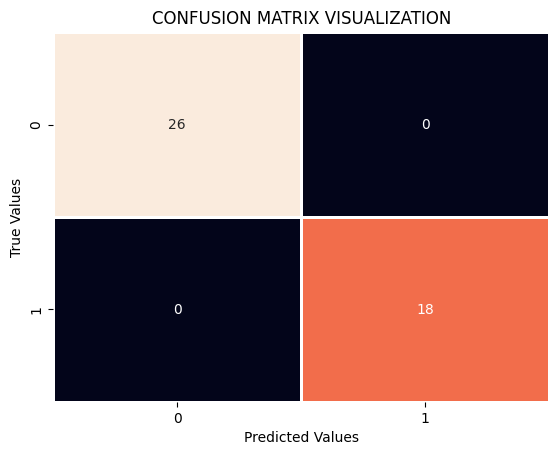

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

model1 = DecisionTreeClassifier()

model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)


conf = confusion_matrix(y_test,y_pred)
print(conf)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()

In [33]:
df['Bankrupt?'].value_counts()

0    220
1    220
Name: Bankrupt?, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler


In [ ]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)


In [ ]:
print(X_resampled, y_resampled)

In [ ]:
y_resampled.value_counts()

1    6599
0    6599
Name: Bankrupt?, dtype: int64

NOT USING OVER SAMPLING BECAUSE IT IS OVER FITTING THE DATA. UNDERSAMPLING ALTHOUGH HAVE LESSER VALUES BUT ALL ARE RANDOM

In [12]:
from imblearn.under_sampling import RandomUnderSampler

In [16]:
a = df['Bankrupt?']
b = df[df.columns[1:]]

In [17]:
Xt, yt = RandomUnderSampler().fit_resample(X, y)

In [18]:
yt.value_counts()

0    220
1    220
Name: Bankrupt?, dtype: int64

In [19]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [20]:
under_sampled_df = pd.concat([Xt, yt], axis=1)


In [21]:
under_sampled_df

ROA(C) before interest and depreciation before interest  \
0                                                 1385          
1                                                   41          
2                                                 1106          
3                                                 2159          
4                                                 1808          
..                                                 ...          
435                                                345          
436                                                  8          
437                                                 68          
438                                                 72          
439                                               1388          

      ROA(A) before interest and % after tax  \
0                                       1668   
1                                        136   
2                                        812   
3                                       1944   
4                                       1782   
..                                       ...   
435                                      213   
436                                       21   
437                                       25   
438                                       62   
439                                     1290   

      ROA(B) before interest and depreciation after tax  \
0                                                 1457    
1                                                   79    
2                                                  978    
3                                                 2202    
4                                                 1670    
..                                                 ...    
435                                                330    
436                                                 12    
437                                                 74    
438                                                 76    
439                                               1182    

      Operating Gross Margin   Realized Sales Gross Margin  \
0                       1160                          1174   
1                          2                             2   
2                       1096                          1111   
3                       1479                          1485   
4                       1988                          2033   
..                       ...                           ...   
435                     2383                          2398   
436                      683                           685   
437                      185                           186   
438                       70                            69   
439                     2856                          2868   

      Operating Profit Rate   Pre-tax net Interest Rate  \
0                      1534                        2074   
1                        37                          41   
2                       792                         797   
3                      1870                        2575   
4                      2103                        1775   
..                      ...                         ...   
435                     624                         324   
436                     958                         123   
437                     641                         357   
438                     141                         142   
439                    2143                        1810   

      After-tax net Interest Rate  \
0                            2105   
1                              52   
2                             809   
3                            2587   
4                            1652   
..                            ...   
435                           323   
436                           122   
437                           356   
438                           144   
439                          1498   

      Non-industry income and expenditur

In [22]:
df = under_sampled_df

In [25]:
df['Bankrupt?'].value_counts()

0    220
1    220
Name: Bankrupt?, dtype: int64

In [ ]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9525904203323559


In [ ]:
df.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)',
       ...
       ' Liability-Assets Flag', ' Net Income to Total Assets',
       ' Total assets to GNP price', ' No-credit Interval',
       ' Gross Profit to Sales', ' Net Income to Stockholder's Equity',
       ' Liability to Equity', ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Equity to Liability'],
      dtype='object', length=188)

In [ ]:
df

ROA(C) before interest and depreciation before interest  \
0                                             0.569541          
1                                             0.506508          
2                                             0.494759          
3                                             0.463023          
4                                             0.494467          
..                                                 ...          
435                                           0.418515          
436                                           0.196802          
437                                           0.337640          
438                                           0.340028          
439                                           0.492176          

      ROA(A) before interest and % after tax  \
0                                   0.614370   
1                                   0.569505   
2                                   0.557948   
3                                   0.512157   
4                                   0.553751   
..                                       ...   
435                                 0.433984   
436                                 0.211023   
437                                 0.254307   
438                                 0.344636   
439                                 0.544320   

      ROA(B) before interest and depreciation after tax  \
0                                             0.620376    
1                                             0.563895    
2                                             0.541571    
3                                             0.509824    
4                                             0.543016    
..                                                 ...    
435                                           0.461427    
436                                           0.221425    
437                                           0.378446    
438                                           0.380213    
439                                           0.533326    

      Operating Gross Margin   Realized Sales Gross Margin  \
0                   0.616844                      0.616844   
1                   0.607129                      0.606999   
2                   0.597666                      0.597666   
3                   0.600909                      0.600909   
4                   0.607309                      0.607309   
..                       ...                           ...   
435                 0.612750                      0.612750   
436                 0.598056                      0.598056   
437                 0.590842                      0.590842   
438                 0.581466                      0.581466   
439                 0.618105                      0.618105   

      Operating Profit Rate   Pre-tax net Interest Rate  \
0                  0.999196                    0.797606   
1                  0.999035                    0.797487   
2                  0.998992                    0.797439   
3                  0.998913                    0.797318   
4                  0.998977                    0.797471   
..                      ...                         ...   
435                0.998864                    0.796902   
436                0.998933                    0.796144   
437                0.998869                    0.796943   
438                0.998372                    0.796292   
439                0.999083                    0.797456   

      After-tax net Interest Rate  \
0                        0.809492   
1                        0.809409   
2                        0.809350   
3                        0.809248   
4                        0.809380   
..                            ...   
435                      0.808857   
436                      0.808149   
437                      0.808897   
438                      0.808283   
439                      0.809338   

      Non-industry income and expenditur

In [ ]:
acc = accuracy_score(y_test,y_pred)
print(acc)

1.0


In [36]:
res = classification_report(y_test,y_pred)
print(res)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        18

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



In [37]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

1.0

In [38]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

1.0

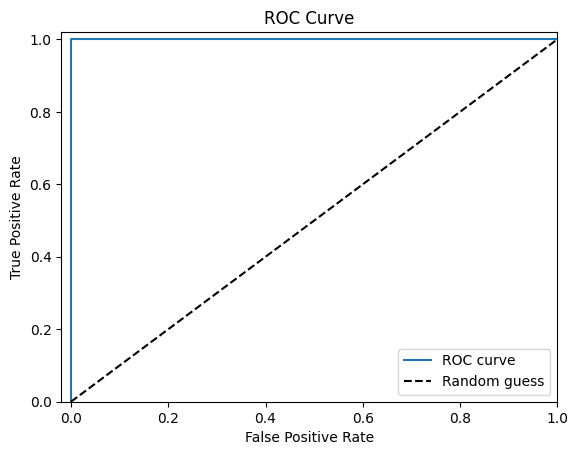

In [39]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_pred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")